In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import missingno as mns
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [4]:
#importing and reading the dataset and data exploration
Obsd = pd.read_csv('ObesityDataSet.csv')
Obsd.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
Obsd.shape

(2111, 17)

In [6]:
Obsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
Obsd.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
#checking the count of Degrees of obesity
Obsd['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [9]:
# Droping the 'Gender' and 'NObeyesdad' columns as they are not useful for clustering
Obsd.drop(['Gender', 'NObeyesdad'], axis=1, inplace=True)

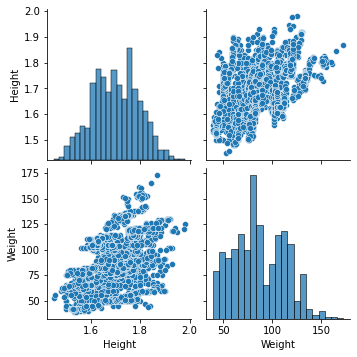

In [10]:
#initial cluster visualization and comparison
X = Obsd.iloc[:,1:5]
sns.pairplot(X)

In [11]:
# Converting the categorical features to numerical using one-hot encoding
Obsd1 = pd.get_dummies(Obsd, columns=['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE','SCC','CALC','MTRANS'])

In [12]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(Obsd1)

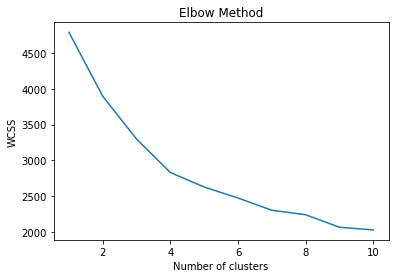

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Perform clustering with the optimal number of clusters
n_clusters = 4  # chosen based on the elbow method
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

In [15]:
#using PCA method to reduce dataset dimensionality 
#and cannot visualize scatterplot for such 
from sklearn.decomposition import PCA

ps = PCA(n_components=2)
f_reduced = ps.fit_transform(data_scaled)

ps.explained_variance_ratio_

array([0.20045668, 0.18266339])

In [16]:
#summing variance ratio to know percentage of retained original variance
#about 38% of  variance retained
sum(ps.explained_variance_ratio_)

0.3831200695109228

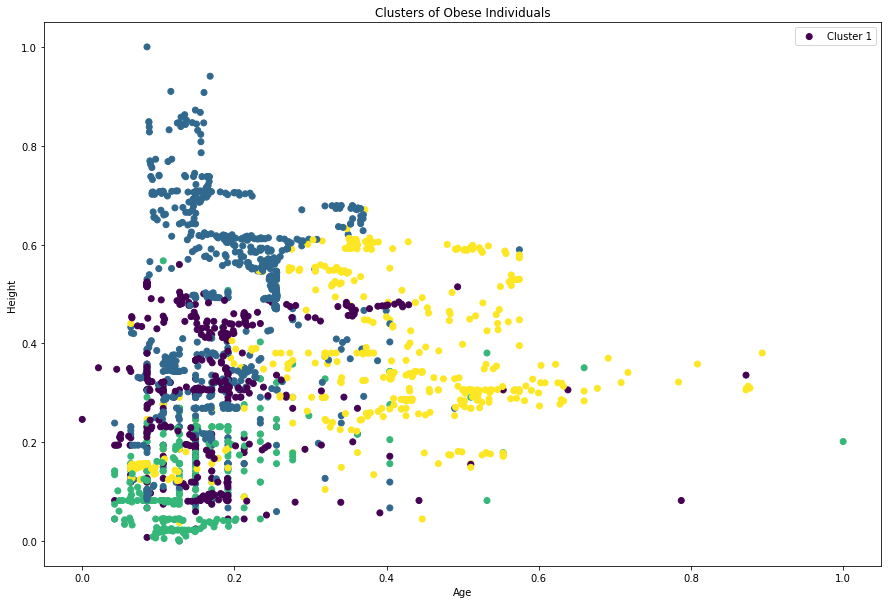

In [24]:
import matplotlib.pyplot as plt

# Define cluster labels
cluster_labels = kmeans.labels_

# Define label names
label_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Visualizing the clusters
plt.figure(figsize=(15,10))
plt.scatter(data_scaled[:, 0], data_scaled[:, 2], c=cluster_labels)
plt.title('Clusters of Obese Individuals')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend(label_names)
plt.show()


Text(0.5, 1.0, 'Clusters of Obese Individuals')

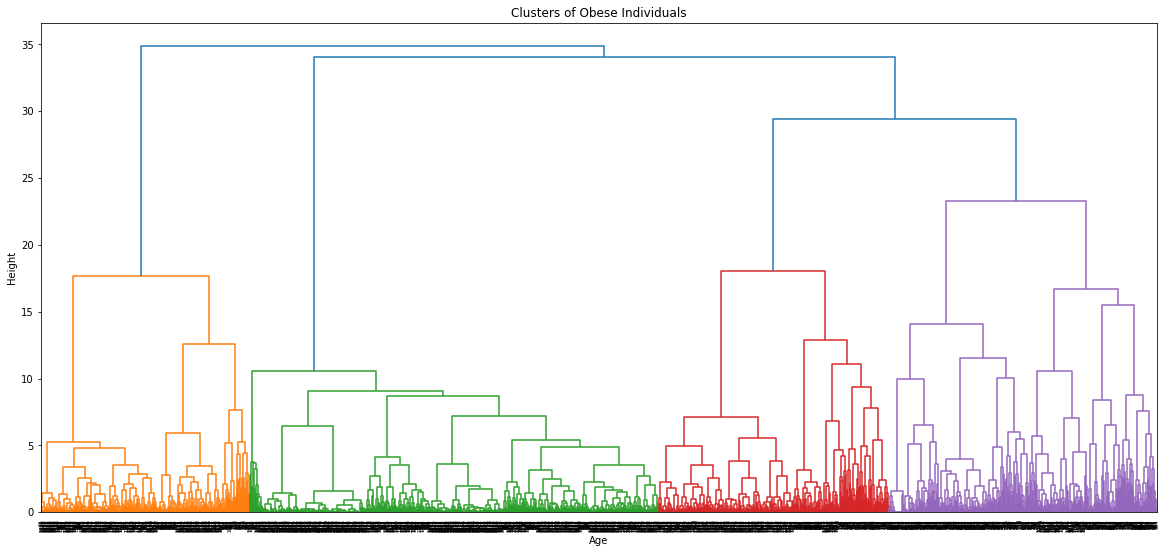

In [18]:
#HIERARCHICAL CLUSTERING
#sorting number of clusters using dendogram
plt.figure(figsize=(20,9))
dendrogram = sch.dendrogram(sch.linkage(data_scaled,method ='ward'))
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Clusters of Obese Individuals')

In [19]:
#filling the clustering method into the dataset
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_means2=hc.fit_predict(data_scaled)

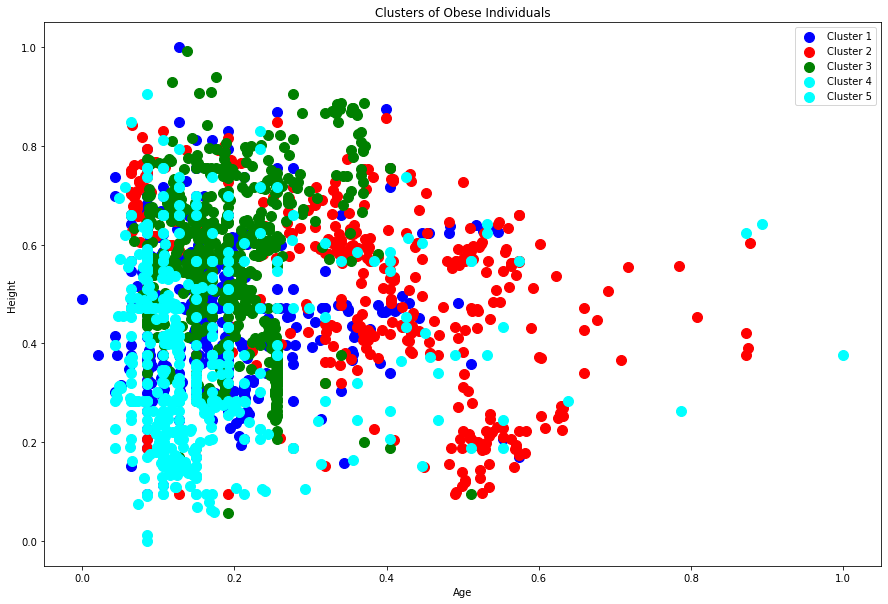

In [23]:
#hierarchical cluster visualization
#plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.scatter(data_scaled[y_means2==0,0],data_scaled[y_means2==0,1],c='blue', s=100,label='Cluster 1')
plt.scatter(data_scaled[y_means2==1,0],data_scaled[y_means2==1,1],c='red', s=100,label ='Cluster 2')
plt.scatter(data_scaled[y_means2==2,0],data_scaled[y_means2==2,1],c='green', s=100,label='Cluster 3')
plt.scatter(data_scaled[y_means2==3,0],data_scaled[y_means2==3,1],c='cyan', s=100,label ='Cluster 4')
plt.scatter(data_scaled[y_means2==4,0],data_scaled[y_means2==4,1],c='cyan', s=100,label ='Cluster 5')
plt.title('Clusters of Obese Individuals')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()